# Homework #4  (Due date: 15th of December, 23:59)
- Download the Mall Customer Segmentation Data from our github repo.
- Use only 3 features (Age, Income and Spending Score) and run k-means algorithm. Determine/choose the optimum "k" value using the elbow method. Show your plot (error vs. k)
- Again with the same 3 features, scatter your data in a 3D plot. Coloring of samples should denote the determined categories (your optimum k). I.e. we should be able to distinguish the samples of k categories. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import v_measure_score, completeness_score, homogeneity_score
from sklearn import cluster, datasets, mixture

!git clone https://github.com/UMBC-Data-Science/DATA602Datasets.git
df = pd.read_csv("./DATA602Datasets/Mall_Customers.csv")


Cloning into 'DATA602Datasets'...
remote: Enumerating objects: 72, done.
remote: Total 72 (delta 0), reused 0 (delta 0), pack-reused 72
Unpacking objects: 100% (72/72), done.


In [2]:
data = df[["Age", "Annual Income (k$)","Spending Score (1-100)"]]
data.head(5)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


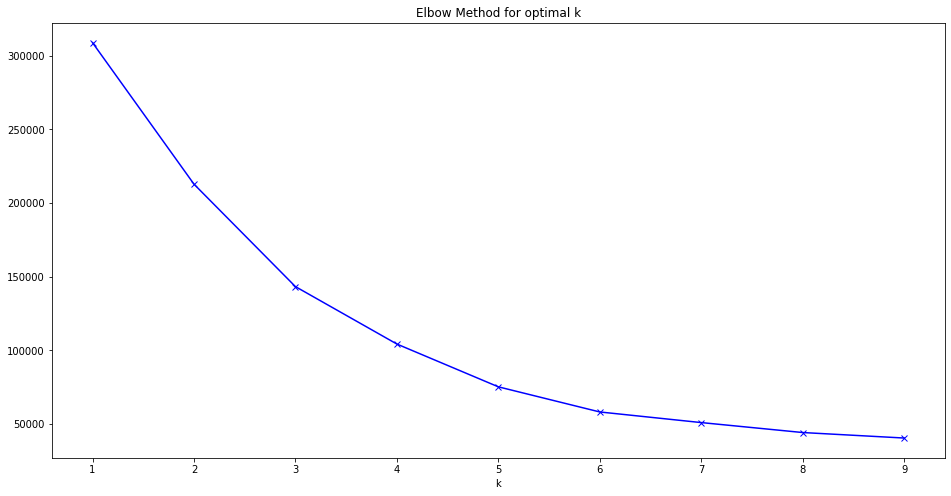

In [3]:
list1 = []
for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    list1.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(range(1,10), list1, 'bx-')
plt.xlabel('k')
plt.title('Elbow Method for optimal k')
plt.show()

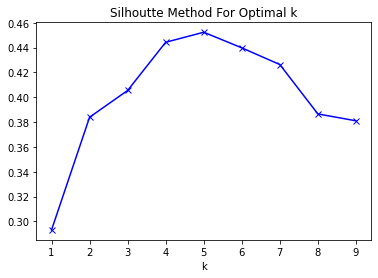

In [4]:
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 11):
  kmeans = KMeans(n_clusters = k).fit(data)
  labels = kmeans.labels_
  sil.append(silhouette_score(data, labels, metric = 'euclidean'))

plt.plot(range(1,10), sil, 'bx-')
plt.xlabel('k')
plt.title('Silhoutte Method For Optimal k')
plt.show()

## I could not be sure about what is the optimal k in elbow method, i believe silhoutte method is an easier method to distinguish with the eye

In [8]:
k_means_optimum = KMeans(n_clusters = 5, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(data)
y

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [6]:
data['cluster'] = y  
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]
data4 = data[data.cluster==3]
data5 = data[data.cluster==4]


<ipython-input-6-a55605f2b9fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = y


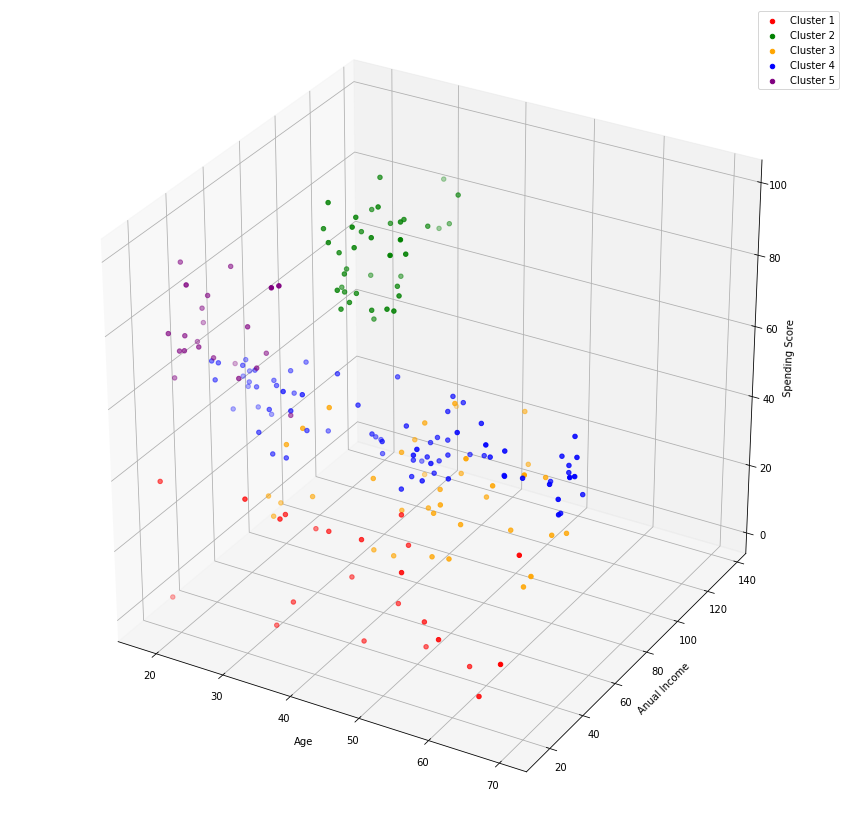

In [7]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data1["Age"], data1["Annual Income (k$)"], data1["Spending Score (1-100)"], c='red', label = 'Cluster 1')
ax.scatter3D(data2["Age"],data2["Annual Income (k$)"],data2["Spending Score (1-100)"],c ='green', label = 'Cluster 2')
ax.scatter3D(data3["Age"], data3["Annual Income (k$)"], data3["Spending Score (1-100)"], c='orange', label = 'Cluster 3')
ax.scatter3D(data4["Age"], data4["Annual Income (k$)"], data4["Spending Score (1-100)"], c='blue', label = 'Cluster 4')
ax.scatter3D(data5["Age"], data5["Annual Income (k$)"], data5["Spending Score (1-100)"], c='purple', label = 'Cluster 5')
ax.set_xlabel('Age')
ax.set_ylabel('Anual Income')
ax.set_zlabel('Spending Score')
ax.legend()
plt.show()